<a href="https://colab.research.google.com/github/cedkim/deeplearning-courseenv/blob/master/2-tensorflow-minimal-example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Minimal Example

## Import the relevant libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [16]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Solving with Tensorflow

In [17]:
training_data = np.load('TF_intro.npz')

In [18]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                  kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                  bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 824us/step - loss: 29.6847
Epoch 2/100
32/32 [==============================] - 0s 858us/step - loss: 4.4775
Epoch 3/100
32/32 [==============================] - 0s 761us/step - loss: 1.4252
Epoch 4/100
32/32 [==============================] - 0s 893us/step - loss: 0.6502
Epoch 5/100
32/32 [==============================] - 0s 830us/step - loss: 0.4289
Epoch 6/100
32/32 [==============================] - 0s 805us/step - loss: 0.3723
Epoch 7/100
32/32 [==============================] - 0s 784us/step - loss: 0.3622
Epoch 8/100
32/32 [==============================] - 0s 839us/step - loss: 0.3607
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3579
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3551
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3560
Epoch 12/100
32/32 [==============================] - 0s 835us/step - loss: 0.3543
Epoch 13/100
32/32

## Extract the weights and bias

In [19]:
model.layers[0].get_weights()

[array([[ 1.9625869],
        [-2.9989903]], dtype=float32), array([4.9931893], dtype=float32)]

In [20]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9625869],
       [-2.9989903]], dtype=float32)

In [21]:
biases = model.layers[0].get_weights()[1]
biases

array([4.9931893], dtype=float32)

## Extract the outputs (make predictions)

In [22]:
model.predict_on_batch(training_data['inputs'])

array([[-3.57410479e+00],
       [ 2.15436363e+00],
       [ 3.97502780e+00],
       [ 4.44709473e+01],
       [-8.51664352e+00],
       [ 1.50967884e+00],
       [-1.11938725e+01],
       [-1.23149319e+01],
       [ 1.24997559e+01],
       [-3.74752579e+01],
       [-3.23318243e+00],
       [ 2.32283974e+00],
       [-2.92642879e+01],
       [ 3.60855484e+00],
       [ 1.78758011e+01],
       [ 2.11042023e+01],
       [ 1.44663486e+01],
       [ 4.52301140e+01],
       [ 9.53453350e+00],
       [-3.37175598e+01],
       [ 2.91289878e+00],
       [ 2.14033184e+01],
       [-3.46607065e+00],
       [-1.27154579e+01],
       [-2.49109230e+01],
       [-3.08165264e+01],
       [ 1.74377060e+01],
       [-8.32532501e+00],
       [ 3.38085508e+00],
       [-1.29151325e+01],
       [ 2.09436684e+01],
       [-2.53693562e+01],
       [-1.44302959e+01],
       [-3.50785675e+01],
       [ 2.03545456e+01],
       [ 1.91734123e+01],
       [-1.51648569e+00],
       [-1.26428490e+01],
       [-2.2

In [23]:
training_data['targets'].round(1)

array([[ -4.4],
       [  1.4],
       [  5. ],
       [ 45.4],
       [ -8.1],
       [  1.4],
       [-12.3],
       [-13.3],
       [ 13.3],
       [-38. ],
       [ -3.9],
       [  3.2],
       [-30.1],
       [  2.6],
       [ 18. ],
       [ 20.8],
       [ 15.2],
       [ 46.4],
       [  9.9],
       [-33.9],
       [  3.1],
       [ 21.4],
       [ -2.7],
       [-13.3],
       [-24.6],
       [-30.7],
       [ 17.7],
       [ -9.2],
       [  4.4],
       [-11.9],
       [ 20.8],
       [-25.9],
       [-15.5],
       [-35.4],
       [ 20.1],
       [ 19.9],
       [ -1.8],
       [-12.3],
       [-23. ],
       [  9.2],
       [ 16.7],
       [-10.5],
       [ -0.9],
       [ -2.9],
       [ 18.4],
       [  9.8],
       [ 36.7],
       [ -8.9],
       [ 10.6],
       [ 36.4],
       [ -1.7],
       [ 18.9],
       [-19.2],
       [ -4.1],
       [-20.3],
       [ 21.1],
       [-20.9],
       [  8.1],
       [  0.4],
       [ -6.4],
       [ -9.3],
       [ 10.8],
       [

## Plotting the data

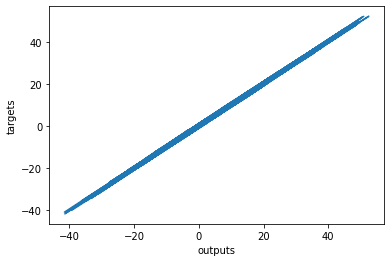

In [24]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()